In [0]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from google.colab import files

In [90]:
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['matches.csv'].decode('utf-8')))
df.head()

Saving matches.csv to matches (1).csv


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [0]:
df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while playing in Mumbai [Easy]

In [130]:
filter_1 = df['city']=='Mumbai' 
filter_2 = df['season'] >= 2010
filter_3 = df['season'] <= 2015
new_df = df[filter_1 & filter_2 & filter_3] # filtering the data according to requirment
new_df['player_of_match'].value_counts().head(1)## frequency count

KA Pollard    6
Name: player_of_match, dtype: int64

# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]

In [95]:
filter_1 = df[df['win_by_runs']>50]
filter_1['winner'].value_counts().head(1)


Chennai Super Kings    11
Name: winner, dtype: int64

# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other
# For example if team1->KKR and team2->CSK
# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]

In [0]:
def comp(x,y):
  filter_x = df['team1']== x
  filter_x1 = df['team2'] == y
  filter_y = df['team2']== x
  filter_y1 = df['team1'] == y
  face_off = df[(filter_x & filter_x1)| (filter_y & filter_y1)]
  print("Total number of face off between the teams : ", face_off['winner'].value_counts()[0] +  face_off['winner'].value_counts()[1])
  print(face_off['winner'].value_counts())

In [192]:
comp('Mumbai Indians','Kolkata Knight Riders')

Total number of face off between the teams :  21
Mumbai Indians           16
Kolkata Knight Riders     5
Name: winner, dtype: int64


In [193]:
comp('Chennai Super Kings','Kolkata Knight Riders')

Total number of face off between the teams :  16
Chennai Super Kings      10
Kolkata Knight Riders     6
Name: winner, dtype: int64


In [194]:
comp('Mumbai Indians','Chennai Super Kings')

Total number of face off between the teams :  22
Mumbai Indians         12
Chennai Super Kings    10
Name: winner, dtype: int64


# Q4 : Plot a bar graph on win_by_wickets col. [Easy]

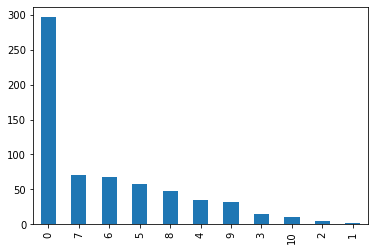

In [191]:
df['win_by_wickets'].value_counts().plot(kind = 'bar')
plt.show()

# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult] 

In [0]:
def prce(a):
  filter_w = df['winner'] == a
  filter_t = df['toss_winner'] == a
  total_toss_win = df[df['toss_winner'] == a].count().head(1)[0] #total toss win
  
  data = df[filter_w & filter_t] # won the toss and match
  
  total_match_win = data['winner'].count() ##total match win after toss
  (total_match_win/total_toss_win)*100
  print("winning percentage after winning toss is : ",p)

In [184]:
prce('Mumbai Indians')

winning percentage after winning toss is :  56.470588235294116


In [195]:
prce('Chennai Super Kings')

winning percentage after winning toss is :  63.63636363636363


In [197]:
prce('Delhi Daredevils')

winning percentage after winning toss is :  45.83333333333333
